## In order to cluster JD based on the description ,lets use KNN algo from scikit learn
Cluster analysis, or clustering, is an unsupervised machine learning task.
It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.
K-Means is the ‘go-to’ clustering algorithm for many simply because it is fast, easy to understand,
and available everywhere (there’s an implementation in almost any statistical or
                          machine learning tool you care to use). 

Highlights of Kmeans 
1.Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 
2. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster. 
3. one of the simplest algorithm which uses unsupervised learning method to solve known clustering issues.  
4. It works really well with large datasets. 
5. Other clustering algorithms with better features tend to be more expensive. In this case, k-means becomes a great solution for pre-clustering, reducing the space into disjoint smaller sub-spaces where other clustering algorithms can be applied. 

In [2]:
## Import the cleaned data csv file ,which we saved in the last exercise with name "Cleaned_corpus_data_frame.csv"

In [3]:
import pandas as pd
import numpy as np


In [358]:
jd_dataframe = pd.read_csv("Cleaned_corpus_data_frame.csv", encoding = 'utf8')

In [359]:
jd_dataframe.head(5)

Job Description
0  within isg  gpu integral part centralized pric...
1  financial advisor safe act seasoned profession...
2  description  finance transformation   governan...
3  application development technology lead analys...
4  serf senior compliance risk officer independen...

In [360]:
##lets check if we have any dup rows and drop if any

In [361]:
jd_dataframe[jd_dataframe['Job Description'].duplicated(keep=False)]

Job Description
1   financial advisor safe act seasoned profession...
4   serf senior compliance risk officer independen...
31  financial advisor safe act seasoned profession...
37  serf senior compliance risk officer independen...

In [362]:
jd_dataframe = jd_dataframe.drop_duplicates("Job Description")
jd_dataframe.size

62

        ### this data is already cleaned ,as we did all the normalization in our previous exercise.
        so ,we can start to work on out clustering task .
        we will try to use KNN unsupervised algorithm to cluster the JDs

    # for the first time ,you can try this code just in case you are not faimiliar with knn

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [363]:
from sklearn.cluster import KMeans
wcss=[]


In [364]:
import matplotlib.pyplot as plt

In [370]:
## Lets save some rows from our data for our testing purpose.
##it is not mandatory in clustering algorithm although .
##and Please shuffle the data well

In [372]:
from sklearn.utils import shuffle

jd_shuffle = shuffle(jd_dataframe)
jd_train = jd_shuffle['Job Description'][0:58].values  
    #lets keep 4 JDs for testing, although it is not necessary in our case
jd_test = jd_shuffle['Job Description'][59:].values  

In [373]:
#TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency.
#it is a measure of originality of a word by comparing number of times a word appear in a doc 
#with number of docs the word appear in.

#it converts a collection of raw documents to a matrix of TF-IDF features. 

In [374]:
vectorizer = TfidfVectorizer(min_df = 0, max_df=0.5, stop_words = "english", ngram_range = (1,4))
X1 = vectorizer.fit_transform(jd_train)

In [375]:
word_features = vectorizer.get_feature_names()
print(len(word_features))


39538



## Her we are using Elbow method to fine the cluster count,
    1.the elbow method is a heuristic used in determining the number of clusters in a data set.  
    2. The method consists of plotting 
    the explained variation -(
                In statistics, explained variation measures the proportion to which 
                a mathematical model accounts for the variation (dispersion) of a given data set. 
                Often, variation is quantified as variance; then, the more specific term explained variance can be used. 
                    )
    as a function of the number of clusters, 
    and picking the elbow of the curve as the number of clusters to use. 


In [377]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


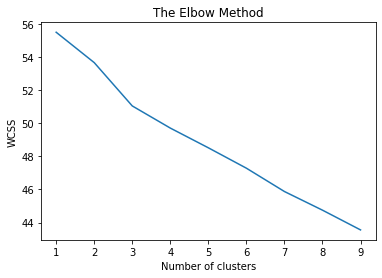

In [369]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [207]:
#  clusters can be    3 ,5 or 6

In [208]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [209]:
#lets try 
true_size1 = 5
true_size2 = 6

    ###Kmeans hyper parameters :
    init --‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
    
    n_clustersint, default=8 , The number of clusters to form as well as the number of centroids to generate.
    
    n_initint, default=10 ,Number of time the k-means algorithm will be run with different centroid seeds.
    
    max_iterint, default=300 ,Maximum number of iterations of the k-means algorithm for a single run.
    
    random_state, default=None ,Determines random number generation for centroid initialization
    

In [379]:
kmeans5 = KMeans(n_clusters = true_size1, n_init = 20) # n_init(number of iterations for clsutering) 
kmeans5.fit(X1)
# We look at  the clusters generated by k-means.
common_words = kmeans5.cluster_centers_.argsort()[:,::-1]
#for num, centroid in enumerate(common_words):
    #print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

In [380]:
kmeans6 = KMeans(n_clusters = true_size2, init='k-means++',max_iter=300,n_init=10,random_state=0 ) # n_init(number of iterations for clsutering) 
kmeans6.fit(X1)
# We look at 8 the clusters generated by k-means.
common_words = kmeans6.cluster_centers_.argsort()[:,::-1]
#for num, centroid in enumerate(common_words):
 #   print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

In [212]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

##handle stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = (stopwords.words('english'))
stop_words.append('nbsp')

import string
from io import StringIO

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amittiwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
def cleanCorpus(text):
    #print("########input text############")
    
    #tokenization
    #print("########Tokenization############")
    token = word_tokenize(text.lower())
    #print(token)
    
    #lemetization 
    #print("########lemetization############")
    lemmatizer = WordNetLemmatizer() 
    lemmatized_text = [lemmatizer.lemmatize(word) for word in token]
    
    
    
    #handling stop words 
    #print("########Stop words handling ############")
    stop_words = (stopwords.words('english'))
    stop_words.append('nbsp')
    stop_words.append('amp')
    
    stop_words_removed = [word for word in lemmatized_text if word not in stop_words ]
    #print(stop_words_removed)
    
    
    ##puncutation removal
    #print("########Punctuation removal############")
    punc_removed = str(stop_words_removed).translate(str.maketrans('', '', string.punctuation))
    #print(punc_removed)
     
     
    return punc_removed

In [ ]:
## we will use cleanCorpus function from last experience on input data coming

In [214]:
#now our model is ready and so lets try to build a pipeline, which will to clustering.
from sklearn.pipeline import Pipeline

In [215]:
pipeline = Pipeline (
    [
        ('vect', vectorizer),
        ('Kmeans', kmeans6)
    ])

In [216]:
##fit the pipeline on our data
pipeline.fit(jd_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.5, min_df=0, ngram_range=(1, 4),
                                 stop_words='english')),
                ('Kmeans', KMeans(n_clusters=6, random_state=0))])

In [382]:
kmeans5.inertia_

48.53758268320653

In [384]:
kmeans6.inertia_

47.44675520030657

        ####Inertia measures how well a dataset was clustered by K-Means. 
        It is calculated by measuring the distance between each data point and its centroid, 
        squaring this distance, and summing these squares across one cluster.
        
                A good model is one with low inertia AND a low number of clusters (K). 
                However, this is a tradeoff because as K increases, inertia decreases.

In [386]:
##now lets try know cluster ids and few terms/words assicated to that cluster

In [387]:
order_centroid = kmeans6.cluster_centers_.argsort()[:,::-1]
for i in range(true_size2):
    print("**Cluster** %d:" %i)
    topTerm=[]
    for ind in order_centroid[i,:10]:
        topTerm.append(word_features[ind])
        #print(word_features[ind])  
    print(topTerm)
#print("\n")

**Cluster** 0:
['impact', 'diversity', 'professional', 'aml', 'analysis', 'potentially', 'requires', 'applies', 'performance', 'quality']
**Cluster** 1:
['application', 'technology', 'api', 'application development', 'programming', 'design', 'product', 'web', 'user', 'participation']
**Cluster** 2:
['regulatory', 'sourcing', 'compliance risk', 'program', 'valuation', 'icrm', 'functionbusinessproduct', 'preparing', 'monitoring', 'global']
**Cluster** 3:
['audit', 'dispute', 'report', 'fund', 'review', 'assigned', 'finance', 'provides', 'investment', 'review type']
**Cluster** 4:
['ca', 'assurance', 'testing', 'compliance risk', 'compliance assurance', 'regulatory', 'assessment', 'compliance testing', 'surveillance', 'risk assessment']
**Cluster** 5:
['technology', 'risk control', 'pricing', 'global', 'loan', 'audit', 'banking', 'key', 'technical', 'operation']


In [ ]:
## A Function where we can pass the text and it will return the cluster id

In [388]:
def predict_cluster(text):
    normalized_text = cleanCorpus(text)
    #print("normalized text: " , normalized_text)
    normalized_text = StringIO( normalized_text) #in order to convert string into dataframe
    
    df_norm = pd.DataFrame(normalized_text)
    #normalized_text = (set)(normalized_text)
    #print(df_norm[0].values)
    pred = pipeline.predict(df_norm[0].values)
    print("Belongs to Cluster: " , pred[0])
    return pred

In [395]:
#jd_test = " "

pred = predict_cluster(jd_test[2])
#pred = predict_cluster(jd_test)

Belongs to Cluster:  1


## Lets try to plot the cluster using matplot lib and pca decompositions.
    to see how does our data cluster looks

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X1.todense())
data = pca.transform(X1.todense())


<Figure size 1800x9000 with 0 Axes>

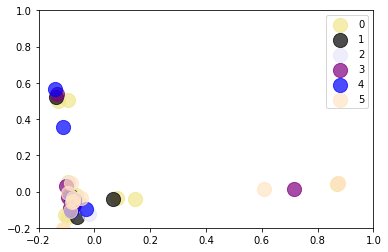

In [403]:

plt.figure(figsize=(25, 125))
labels = kmeans6.labels_
label_set  =set(labels)
#plt.scatter(data[:,0], data[:,1], c=labels.astype(float),label=label_set )
cdict = {0: 'khaki', 1: 'black', 2: 'lavender', 3 :'purple',4:'blue',5:'bisque'}

data_ix = data[0:,0]
data_iy = data[0:,1]
fig, ax = plt.subplots()


ax.set_xlim([-0.2,1])
ax.set_ylim([-0.2,1])
ax.margins(x=0,y=-0.25)  
#ax.xaxis.zoom(-5.2)
#ax.yaxis.zoom(-5.2)

for g in np.unique(labels):
#for g in range (1,len(labels)):
    ix = np.where(labels == g)
    #if (labels==4):
    #print(g)
    #print(ix)
    #if (g==4):
    ax.scatter(data_ix[ix], data_iy[ix], c = cdict[g], label = g, s = 200,alpha=0.7,edgecolors = 'face' )
ax.legend()
plt.show()

### So ,this was a basic K-means clustering implementation done on the given job description data set.
    Given the data set and running elbow methods ,we decided to have 6 clusters.
    which is represented in the plot above by different colors.
    
    Now ,this model can be enhanced by using mutiple advanced techniques and including multiple models 
    to build an Ensemble Model where bagging or boosting can be used to super power the clustering ability.
    
    or train the basic model with more data and a bit of hyper parameter tuning .
